<a href="https://colab.research.google.com/github/christmasv/Estrategias-Efectivas-de-Gestion-y-Desarrollo-de-Proyectos-de-BI/blob/main/Basicos_%7C_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basicos | Machine Learning


 **Author** = [Christopher Soto](https://twitter.com/csv_81)

    @article{khrizoto,     
    Title        = {Basicos | ML},
    Howpublished = {\url{https://khrizoto.wordpress.com/}},
    Year         = {2023}
    }

**Descripción:**

# **Análisis Exploratorio de Datos (EDA) en el Contexto de Machine Learning**

El Análisis Exploratorio de Datos (EDA) es un componente esencial en el proceso de preparación de datos en Machine Learning. Este enfoque implica examinar y comprender el conjunto de datos antes de aplicar modelos de aprendizaje automático.

Aqui vamos a analizar los aspectos claves:

1.   Visualización de Datos
2.   Resumen Estadístico
3.   Manejo de Datos Faltantes
4.   Detección de Anomalías
5.   Exploración de Relaciones

En la travesía hacia la construcción de modelos de aprendizaje automático, el primer paso crucial es adentrarse en la comprensión profunda de los datos. En este viaje, contar con la biblioteca Pandas se convierte en una herramienta indispensable. Pandas, ampliamente reconocida como la piedra angular en la caja de herramientas de los científicos de datos, facilita la exploración y manipulación de datos de manera eficiente.

In [ ]:
# Sintaxis:
import pandas as pd

La parte más importante de la biblioteca Pandas es el DataFrame. Un DataFrame contiene el tipo de datos que podría considerar una tabla. Esto es similar a una hoja en Excel o una tabla en una base de datos SQL.

Utilizaremos un dataset académico "Melbourne Housing Snapshot"

In [ ]:
#Importamos el dataframe
melbourne_file_path = '/content/melb_data.csv'


In [ ]:
#Leer los datos y almacenarlos en DataFrame titulado melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path)

In [ ]:
#Imprimir información de los estadisticos del dataframe utilizando el comando "describe()""
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000



La interpretación de los datos estadísticos implica analizar los 8 números asociados con cada columna en el conjunto de datos original. El recuento indica cuántas filas contienen valores no faltantes. La presencia de valores faltantes se debe a diversas razones, como la falta de recopilación de datos específicos.

La media representa el promedio, mientras que la desviación estándar (std) mide la dispersión numérica de los valores. Para comprender los valores mínimo, 25%, 50%, 75%, y máximo, visualice ordenar cada columna de menor a mayor. El mínimo es el valor más pequeño. El 25% es el valor que supera al 25% de los datos y es inferior al 75%. De manera similar, los percentiles 50 y 75 se definen, y el máximo es el valor más grande. Este enfoque proporciona una visión detallada de la distribución y variabilidad de los datos.

¿Cómo puedes reducir esta abrumadora cantidad de datos a algo que puedas entender? Comenzaremos eligiendo algunas variables usando nuestra intuición. Cursos posteriores le mostrarán técnicas estadísticas para priorizar variables automáticamente. Para elegir variables

In [ ]:
#Metodo para listar las columnas
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# dropna elimina los valores faltantes (piense en na como "no disponible")
melbourne_data = melbourne_data.dropna(axis=0)

Seleccionar el objetivo de predicción
Puede extraer una variable con notación de puntos. Esta única columna se almacena en una Serie, que en términos generales es como un DataFrame con una sola columna de datos.

Usaremos la notación de puntos para seleccionar la columna que queremos predecir, que se denomina objetivo de predicción. Por convención, el objetivo de predicción se denomina "y". Entonces, el código que necesitamos para guardar los precios de la vivienda en los datos de Melbourne es

In [ ]:
y = melbourne_data.Price

Elegir "Características"
Las columnas que se ingresan en nuestro modelo (y luego se usan para hacer predicciones) se denominan "características". En nuestro caso, esas serían las columnas utilizadas para determinar el precio de la vivienda. A veces, utilizará todas las columnas excepto la de destino como características. Otras veces estará mejor con menos funciones.

Por ahora, construiremos un modelo con sólo unas pocas características. Más adelante verá cómo iterar y comparar modelos creados con diferentes características.

Seleccionamos múltiples funciones proporcionando una lista de nombres de columnas entre paréntesis. Cada elemento de esa lista debe ser una cadena (entre comillas).

In [ ]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [ ]:
#Por conveniencia le llamaremos "X"
X = melbourne_data[melbourne_features]

Repasemos rápidamente los datos que usaremos para predecir los precios de la vivienda utilizando el método de descripción y el método principal, que muestra las filas superiores.

In [ ]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [ ]:
X.head()


,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


Verificar visualmente sus datos con estos comandos es una parte importante del trabajo de un científico de datos. Con frecuencia encontrará sorpresas en el conjunto de datos que merecen una inspección más detallada.

# **Construyendo su modelo**

Utilizará la biblioteca scikit-learn para crear sus modelos. Al codificar, esta biblioteca se escribe como sklearn, como verá en el código de muestra. Scikit-learn es fácilmente la biblioteca más popular para modelar los tipos de datos que normalmente se almacenan en DataFrames.

**Los pasos para construir y utilizar un modelo son:**

* Definir: ¿Qué tipo de modelo será? ¿Un árbol de
decisiones? ¿Algún otro tipo de modelo? También se especifican algunos otros parámetros del tipo de modelo.
* Ajuste: capture patrones a partir de los datos proporcionados. Este es el corazón del modelaje.
* Predecir: justo lo que parece
* Evaluar: determinar qué tan precisas son las predicciones del modelo.

A continuación se muestra un ejemplo de cómo definir un modelo de árbol de decisión con scikit-learn y ajustarlo con las características y la variable objetivo.

In [ ]:
#Importar libreria
from sklearn.tree import DecisionTreeRegressor

Definir modelo. Especifique un número para random_state para garantizar los mismos resultados en cada ejecución.

In [ ]:
# Definir modelo. Especifique un número para random_state para garantizar los mismos resultados en cada ejecución.
melbourne_model = DecisionTreeRegressor(random_state=1)

In [ ]:
# Primer Model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Muchos modelos de aprendizaje automático permiten cierta aleatoriedad en el entrenamiento del modelo. Especificar un número para random_state garantiza que obtendrá los mismos resultados en cada ejecución. Esto se considera una buena práctica. Utilice cualquier número y la calidad del modelo no dependerá significativamente del valor exacto que elija.

Ahora tenemos un modelo ajustado que podemos utilizar para hacer predicciones.

En la práctica, querrás hacer predicciones sobre las casas nuevas que saldrán al mercado en lugar de las casas cuyos precios ya tenemos. Pero haremos predicciones para las primeras filas de los datos de entrenamiento para ver cómo funciona la función de predicción.

In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


Estos resultados de predicción están asociados con las características de cinco casas específicas. Las características de cada casa, representadas por las columnas Rooms, Bathroom, Landsize, Lattitude y Longtitude.  Las predicciones asociadas a estos datos de entrada son [1035000. 1465000. 1600000. 1876000. 1636000.], que representan los valores estimados para el precio de cada una de estas casas.

# **MODELADO**

¿Qué es la validación de modelos?
Querrá evaluar casi todos los modelos que haya construido. En la mayoría de las aplicaciones (aunque no en todas), la medida relevante de la calidad del modelo es la precisión predictiva. En otras palabras, ¿las predicciones del modelo se acercarán a lo que realmente sucede?

Mucha gente comete un gran error al medir la precisión predictiva. Hacen predicciones con sus datos de entrenamiento y las comparan con los valores objetivo en los datos de entrenamiento. Verá el problema con este enfoque y cómo resolverlo en un momento, pero pensemos en cómo haríamos esto primero.
Primero deberá resumir la calidad del modelo de una manera comprensible. Si compara los valores reales y previstos de 10.000 casas, probablemente encontrará una combinación de predicciones buenas y malas. Sería inútil revisar una lista de 10.000 valores previstos y reales. Necesitamos resumir esto en una sola métrica.

Hay muchas métricas para resumir la calidad del modelo, pero comenzaremos con una llamada Error Absoluto Medio (también llamado MAE). Analicemos esta métrica comenzando con la última palabra, error.

In [ ]:
# El error de predicción para cada casa es:
# error=actual−predicted

Entonces, si una casa cuesta 250,000 y usted predijo que costaría 100,000, el error es 150,000.

Con la métrica MAE tomamos el valor absoluto de cada error. Esto convierte cada error en un número positivo. Luego tomamos el promedio de esos errores absolutos. Esta es nuestra medida de la calidad del modelo. En lenguaje sencillo, se puede decir como

En promedio, nuestras predicciones están equivocadas en aproximadamente X.

Para calcular MAE, primero necesitamos un modelo. Está integrado en una celda oculta debajo, que puede revisar haciendo clic en el botón de código.

In [ ]:

from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

# El problema de las puntuaciones "dentro de la muestra"

La medida que acabamos de calcular se puede denominar puntuación "dentro de la muestra". Utilizamos una única "muestra" de casas tanto para construir el modelo como para evaluarlo. He aquí por qué esto es malo.

Imaginemos que, en el gran mercado inmobiliario, el color de las puertas no guarda relación con el precio de la vivienda.

Sin embargo, en la muestra de datos que utilizó para construir el modelo, todas las casas con puertas verdes eran muy caras. El trabajo del modelo es encontrar patrones que predigan los precios de las viviendas, por lo que verá este patrón y siempre predecirá precios altos para las viviendas con puertas verdes.

Dado que este patrón se derivó de los datos de entrenamiento, el modelo aparecerá preciso en los datos de entrenamiento.

Pero si este patrón no se mantiene cuando el modelo ve nuevos datos, el modelo sería muy inexacto cuando se use en la práctica.

Dado que el valor práctico de los modelos proviene de hacer predicciones sobre datos nuevos, medimos el rendimiento de datos que no se utilizaron para construir el modelo. La forma más sencilla de hacer esto es excluir algunos datos del proceso de creación del modelo y luego usarlos para probar la precisión del modelo en datos que no se han visto antes. Estos datos se denominan datos de validación.
# Codificándolo
La biblioteca scikit-learn tiene una función train_test_split para dividir los datos en dos partes. Usaremos algunos de esos datos como datos de entrenamiento para ajustarnos al modelo y usaremos los demás datos como datos de validación para calcular el error_absoluto medio.

In [ ]:
from sklearn.model_selection import train_test_split

# dividir los datos en datos de entrenamiento y validación, tanto para las funciones como para el objetivo
# La división se basa en un generador de números aleatorios. Proporcionar un valor numérico a
# el argumento random_state garantiza que obtendremos la misma división cada vez que
# ejecutar este script.

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define el modelo
melbourne_model = DecisionTreeRegressor()
# Ajuste el modelo
melbourne_model.fit(train_X, train_y)

# obtener precios previstos en los datos de validación
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


276308.4577146546


# Desajuste y sobreajuste | Underfitting and Overfitting

Ajuste su modelo para obtener un mejor rendimiento.

El desajuste (underfitting) y el sobreajuste (overfitting) son fenómenos comunes en modelos de aprendizaje automático (ML).

**Desajuste (Underfitting)**:
El desajuste ocurre cuando un modelo es demasiado simple para capturar la complejidad de los datos de entrenamiento. Como resultado, el modelo no puede ajustarse adecuadamente ni representar patrones importantes. Se manifiesta en un rendimiento deficiente tanto en los datos de entrenamiento como en los de prueba.

**Sobreajuste (Overfitting)**:
El sobreajuste se produce cuando un modelo se ajusta demasiado a los datos de entrenamiento, capturando incluso el ruido y las variaciones insignificantes. Aunque el modelo puede rendir bien en los datos de entrenamiento, su desempeño tiende a ser deficiente en datos no vistos, ya que ha memorizado en lugar de generalizar patrones.

**Equilibrio**:
El objetivo es encontrar un equilibrio entre ambos extremos. Un modelo bien ajustado generaliza bien a datos no vistos. Se puede lograr mediante técnicas como la validación cruzada, ajuste de hiperparámetros y el uso de conjuntos de datos de prueba y validación.

Recuerda que el monitoreo constante del rendimiento del modelo es esencial para evitar desajustes y sobreajustes, asegurando así la robustez y la generalización adecuada del modelo.

Mean Absolute Error (MAE):

El MAE es una métrica de evaluación común en modelos de regresión. Mide el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales.
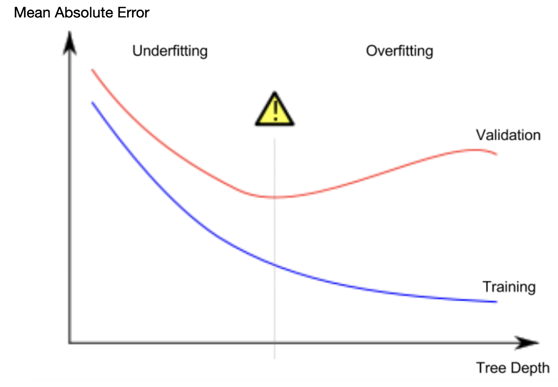

Podemos usar una función de utilidad para ayudar a comparar puntuaciones MAE de diferentes valores para max_leaf_nodes

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271320


**En resumen**, los modelos enfrentan desafíos críticos, entre ellos:

**Sobreajuste:** Este problema se presenta cuando un modelo aprende patrones específicos del conjunto de entrenamiento que no son representativos de la realidad general. Esto puede resultar en predicciones inexactas al encontrarse con nuevos datos.

**Desajuste:** Contrariamente, el desajuste ocurre cuando un modelo es demasiado simple para capturar patrones relevantes en los datos de entrenamiento, lo que también conduce a predicciones menos precisas al enfrentarse a situaciones del mundo real.

Para abordar estos problemas, utilizamos datos de validación, que no forman parte del proceso de entrenamiento del modelo. Esta estrategia nos permite evaluar el rendimiento de múltiples modelos candidatos y seleccionar aquel que demuestre la mejor capacidad de generalización y precisión en la predicción de datos futuros. Al emplear este enfoque, buscamos encontrar el equilibrio óptimo entre la capacidad del modelo para aprender patrones relevantes y su habilidad para evitar la captura de información irrelevante, asegurando así la robustez y eficacia del modelo en el mundo real.

**Validación del Modelo**

¿Qué es la validación de modelos?

Querrá evaluar casi todos los modelos que haya construido. En la mayoría de las aplicaciones (aunque no en todas), la medida relevante de la calidad del modelo es la precisión predictiva. En otras palabras, ¿las predicciones del modelo se acercarán a lo que realmente sucede?

Mucha gente comete un gran error al medir la precisión predictiva. Hacen predicciones con sus datos de entrenamiento y las comparan con los valores objetivo en los datos de entrenamiento. Verá el problema con este enfoque y cómo resolverlo en un momento, pero pensemos en cómo haríamos esto primero.

Primero deberá resumir la calidad del modelo de una manera comprensible. Si compara los valores reales y previstos de 10.000 casas, probablemente encontrará una combinación de predicciones buenas y malas. Sería inútil revisar una lista de 10.000 valores previstos y reales. Necesitamos resumir esto en una sola métrica.

Hay muchas métricas para resumir la calidad del modelo, pero comenzaremos con una llamada Error Absoluto Medio (también llamado MAE). Analicemos esta métrica comenzando con la última palabra, error.

In [ ]:
# error=actual−predicted

In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

69750.45206584893

El problema de las puntuaciones "dentro de la muestra"
La medida que acabamos de calcular se puede denominar puntuación "dentro de la muestra". Utilizamos una única "muestra" de casas tanto para construir el modelo como para evaluarlo. He aquí por qué esto es malo.

Imaginemos que, en el gran mercado inmobiliario, el color de las puertas no guarda relación con el precio de la vivienda.

Sin embargo, en la muestra de datos que utilizó para construir el modelo, todas las casas con puertas verdes eran muy caras. El trabajo del modelo es encontrar patrones que predigan los precios de las viviendas, por lo que verá este patrón y siempre predecirá precios altos para las viviendas con puertas verdes.

Dado que este patrón se derivó de los datos de entrenamiento, el modelo aparecerá preciso en los datos de entrenamiento.

Pero si este patrón no se mantiene cuando el modelo ve nuevos datos, el modelo sería muy inexacto cuando se use en la práctica.

Dado que el valor práctico de los modelos proviene de hacer predicciones sobre datos nuevos, medimos el rendimiento de datos que no se utilizaron para construir el modelo. La forma más sencilla de hacer esto es excluir algunos datos del proceso de creación del modelo y luego usarlos para probar la precisión del modelo en datos que no se han visto antes. Estos datos se denominan datos de validación.

Codificándolo
La biblioteca scikit-learn tiene una función train_test_split para dividir los datos en dos partes. Usaremos algunos de esos datos como datos de entrenamiento para ajustar el modelo y usaremos los demás datos como datos de validación para calcular el error_absoluto medio.

In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

276079.2683451689


¡Guau!
Su error absoluto medio para los datos de la muestra fue de unos 500 dólares. Fuera de muestra asciende a más de 277.044 dólares.

Ésta es la diferencia entre un modelo que es casi exactamente correcto y uno que no se puede utilizar para la mayoría de los propósitos prácticos. Como punto de referencia, el valor medio de la vivienda en los datos de validación es de 1,1 millones de dólares. Entonces, el error en los nuevos datos es aproximadamente una cuarta parte del valor promedio de una vivienda.

Hay muchas formas de mejorar este modelo, como experimentar para encontrar mejores características o diferentes tipos de modelos.